Chapter 7
# 移动回归系数
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
# !pip install yfinance

In [2]:
# Rolling regression

import pandas as pd
import pandas_datareader as web
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
# import pandas_datareader as web
import statsmodels.api as sm
import yfinance as yf

In [3]:
y_levels_df = yf.download(['TSLA'], start='2018-08-01', end='2021-08-01')

y_levels_df.round(2).head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,19.87,20.20,19.53,20.06,20.06,151941000
2018-08-02,21.90,23.33,21.54,23.30,23.30,348225000
2018-08-03,23.19,23.67,22.84,23.21,23.21,204847500
2018-08-06,23.03,23.67,22.79,22.80,22.80,128464500
2018-08-07,22.92,25.83,22.61,25.30,25.30,463137000


In [4]:
y_df = y_levels_df['Adj Close'].pct_change()
y_df = y_df.dropna()

In [5]:
x_levels_df = yf.download(['^GSPC'], start='2018-08-01', end='2021-08-01')

x_levels_df.round(2).head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,2821.17,2825.83,2805.85,2813.36,2813.36,3501350000
2018-08-02,2800.48,2829.91,2796.34,2827.22,2827.22,3501380000
2018-08-03,2829.62,2840.38,2827.37,2840.35,2840.35,3043690000
2018-08-06,2840.29,2853.29,2835.98,2850.40,2850.40,2879020000
2018-08-07,2855.92,2863.43,2855.92,2858.45,2858.45,3185440000


In [6]:
x_df = x_levels_df['Adj Close'].pct_change()
x_df = x_df.dropna()
x_df

Date
2018-08-02    0.004926
2018-08-03    0.004644
2018-08-06    0.003538
2018-08-07    0.002824
2018-08-08   -0.000262
                ...   
2021-07-26    0.002382
2021-07-27   -0.004712
2021-07-28   -0.000186
2021-07-29    0.004206
2021-07-30   -0.005406
Name: Adj Close, Length: 754, dtype: float64

In [7]:
from statsmodels.regression.rolling import RollingOLS

In [8]:
# add a column of ones
X_df = sm.add_constant(x_df)

rols = RollingOLS(y_df, X_df, window=100)
rres = rols.fit()

In [9]:
params = rres.params
print(params.head())

            const  Adj Close
Date                        
2018-08-02    NaN        NaN
2018-08-03    NaN        NaN
2018-08-06    NaN        NaN
2018-08-07    NaN        NaN
2018-08-08    NaN        NaN


In [10]:
print(params.tail())

               const  Adj Close
Date                           
2021-07-26 -0.002049   1.814331
2021-07-27 -0.001836   1.763753
2021-07-28 -0.001417   2.008998
2021-07-29 -0.000495   1.968453
2021-07-30 -0.001326   1.499353


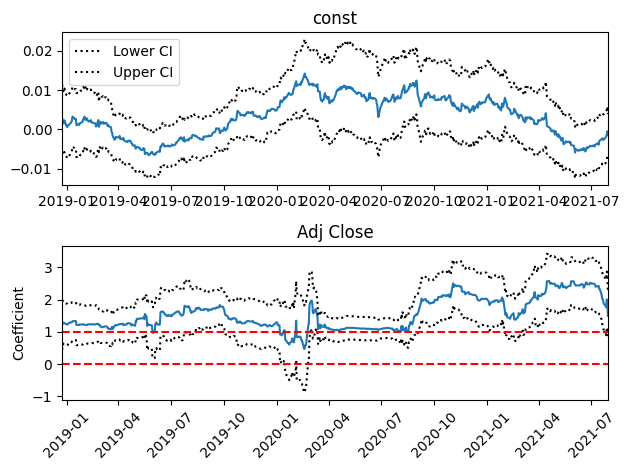

In [11]:
#%% Visualization

fig = rres.plot_recursive_coefficient() # variables=['SP500']
plt.ylabel('Coefficient')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=1, color='r', linestyle='--')
fig.tight_layout() 

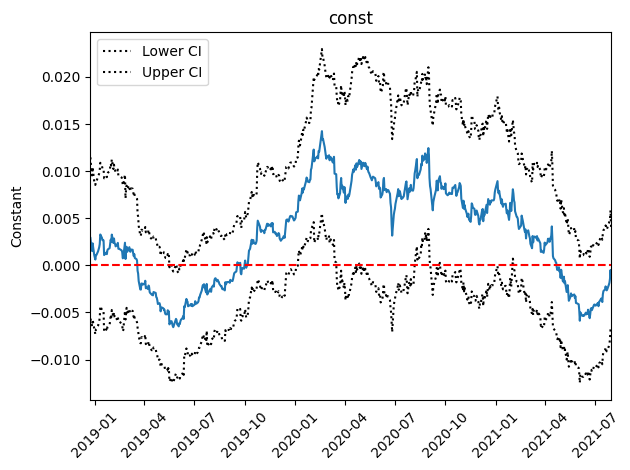

In [12]:
fig = rres.plot_recursive_coefficient(variables=['const'])
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel('Constant')
fig.tight_layout() 